<H1 align="middle">Simulated disease spread</H1>

In this simulated problem we will be faced with simulation of infection spread, where in every stage of simulation more people are added to dataset and they are connected two some of people that was already in population. Our task is to predict if the people are infected during this simulation or not.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('../../data/raw/train.csv', index_col='id')
df

,Population,Index_Patient,Infected,Age,Constitution,Behaviour,Connections,ID
id,,,,,,,,
0,A0,0,1,49,0.347675,2,"['A0#IVLTZG3RF7', 'A0#GDVTM92M4X', 'A0#E3KE282...",A0#ATLCN9GSI2
1,A0,0,1,80,0.324719,1,"['A0#ATLCN9GSI2', 'A0#WXSEW8BMOE', 'A0#R3RP991...",A0#IVLTZG3RF7
2,A0,0,1,71,0.583583,1,"['A0#ATLCN9GSI2', 'A0#BLHYYW2QEY', 'A0#VO1AA39...",A0#GDVTM92M4X
3,A0,0,1,60,0.439978,2,"['A0#ATLCN9GSI2', 'A0#VB5UO8QC2P', 'A0#AFIME21...",A0#E3KE282M20
4,A0,0,1,49,0.553221,1,"['A0#IVLTZG3RF7', 'A0#RP7WNXHVEN', 'A0#051ESMG...",A0#WXSEW8BMOE
...,...,...,...,...,...,...,...,...
649995,M9,0,1,64,0.374531,1,['M9#QO4DIMVSFO'],M9#2655YPXJFD
649996,M9,0,1,64,0.350555,1,['M9#MFYOV3HRBE'],M9#XZT6YD6YGW
649997,M9,0,1,80,0.368369,1,['M9#2XEFZVQE9Q'],M9#HXQO8LWJQB


In [5]:
df.describe()

,Index_Patient,Infected,Age,Constitution,Behaviour
count,650000.000000,650000.000000,650000.000000,650000.000000,650000.000000
mean,0.000200,0.468278,55.022995,0.500378,1.099011
std,0.014141,0.498993,14.998621,0.197870,0.538435
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,45.000000,0.365376,1.000000
50%,0.000000,0.000000,55.000000,0.500102,1.000000
75%,0.000000,1.000000,65.000000,0.635667,1.000000
max,1.000000,1.000000,125.000000,1.000000,2.000000


We can check some of basic descriptive statistics to get introduction to our data. Nothing unusual here.

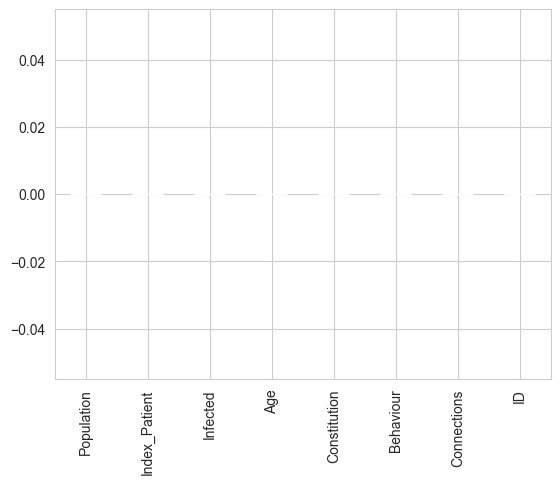

In [6]:
df.isna().sum().plot(kind='bar')
plt.show()

Because this is simulation, no atributes should have missing values. All values are randomly given in this sample of people.

## Exploratory data analysis

Let's plot some simple diagrams that shows basic stats in this problem.

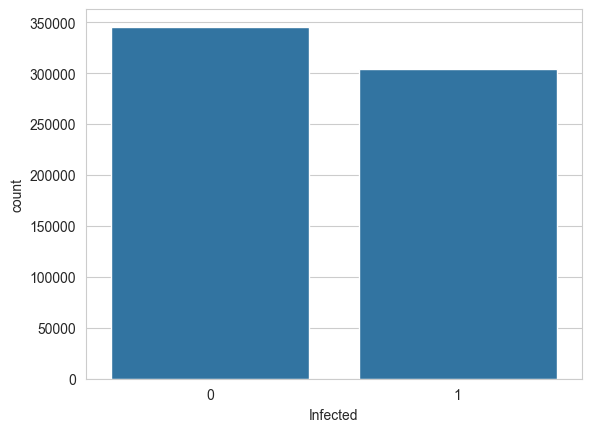

In [7]:
sns.countplot(x=df.Infected)
plt.show()

We can see that variable `Infected` is our output variable and that distribution of groups are very simular, there are little bit more people that are not infected, but difference is not that big.

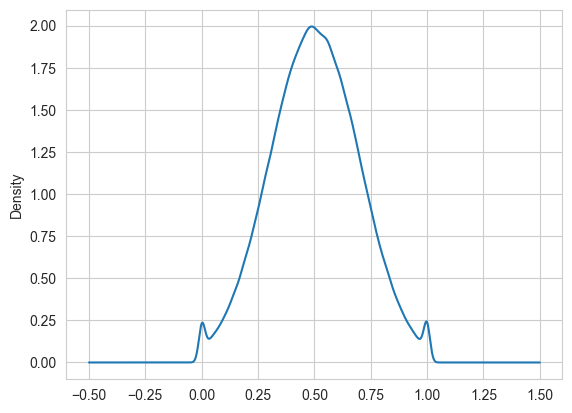

In [8]:
df.Constitution.plot(kind='kde')
plt.show()

`Constitution` is variable that gives information about all around healt of a people. Higher it is, healtier people are. We see that there is distribution very simular to normal, with two pikes on values 1 and 0. It is normal for all continous variables to have normal like distribution because sample is very big (650000 rows of data), so by central limit theorem there is very likelihood that distributions will be normal. 

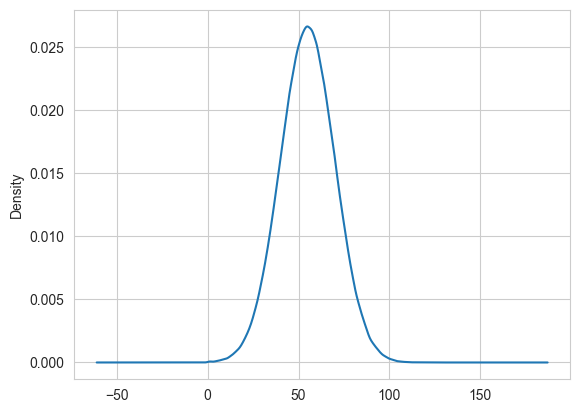

In [9]:
df.Age.plot(kind='kde')
plt.show()

In [10]:
from scipy.stats import skew
skew(df.Age)

0.0015090392331310236

Same story is for `Age` variable. Distribution is pretty normal but we can se skewness is a litlebit higher than ususal. We can check coeffiecient of skewness and see that value is almost 0, so we assume that skewness is normal, even if distribution looks little more spiky.

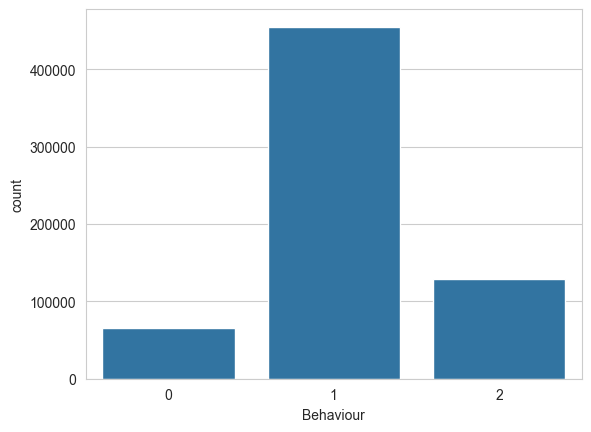

In [11]:
sns.countplot(x=df.Behaviour)
plt.show()

In [12]:
from scipy.stats import chisquare
chisquare(df.Age)

Power_divergenceResult(statistic=2657486.8973576543, pvalue=0.0)

Variable `Behaviour` gives as information how people are reacting to infection spreading. There are three types of people: cautios, moderate and reckless. Because there is much more moderate people that other two groups we assume that values for this variable are not just randomly given and that there must be added some higher weigth to moderate people so there are more of them in dataset. We can check with hi-squared test and see if there is statistically significant difference in observed and expected values.

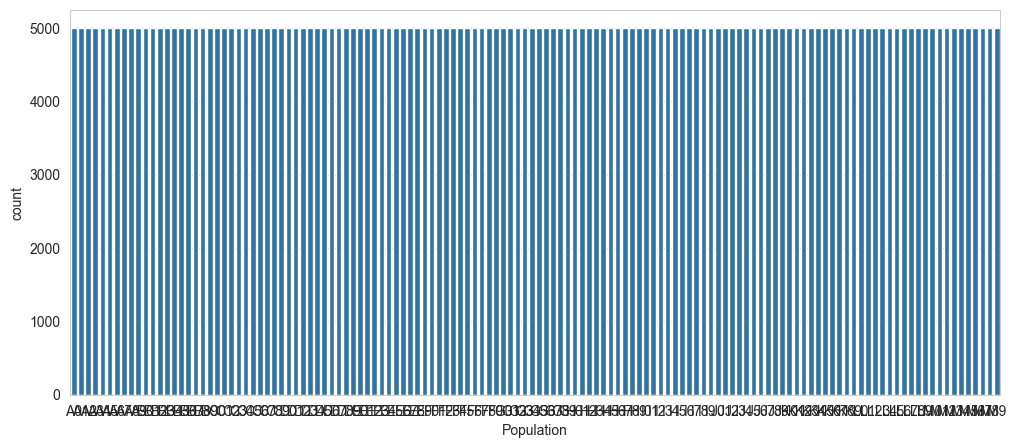

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(x=df.Population)
plt.show()

In this diagram we can see that in every value of `Population` there is equal numberof people. That gives as information about that in every simulation stage, equal numebr of people are added to dataset.

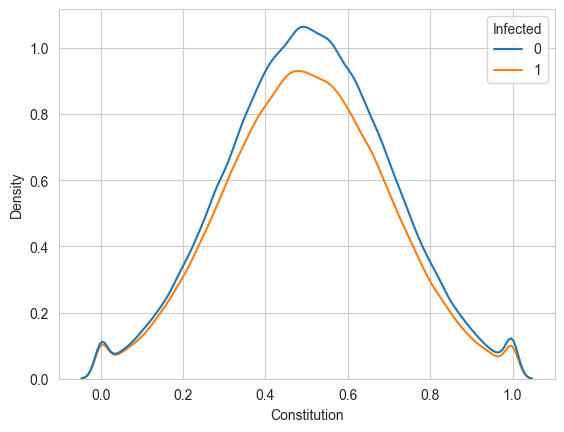

In [14]:
sns.kdeplot(x=df.Constitution, hue=df.Infected)
plt.show()

We can further explore distributions of `Constitution` but divide it into groups by value of `Infected` variable. We can see that this distributions are pritty much same (difference is in number of people, but that is because there is difference in frequencies in those two groups). This can indicate that maybe this variable is not good predictor, but we will see it later.

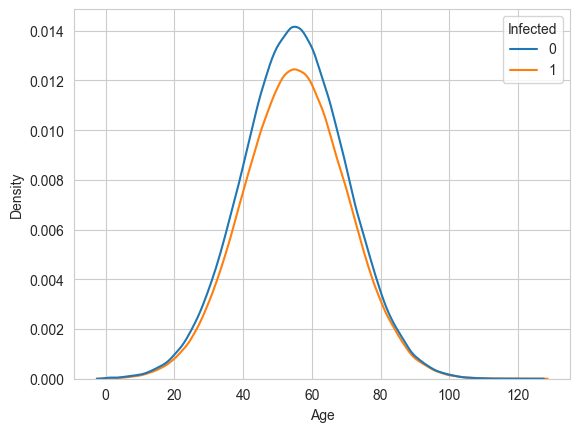

In [15]:
sns.kdeplot(x=df.Age, hue=df.Infected)
plt.show()

Same thing is for variable `Age`.

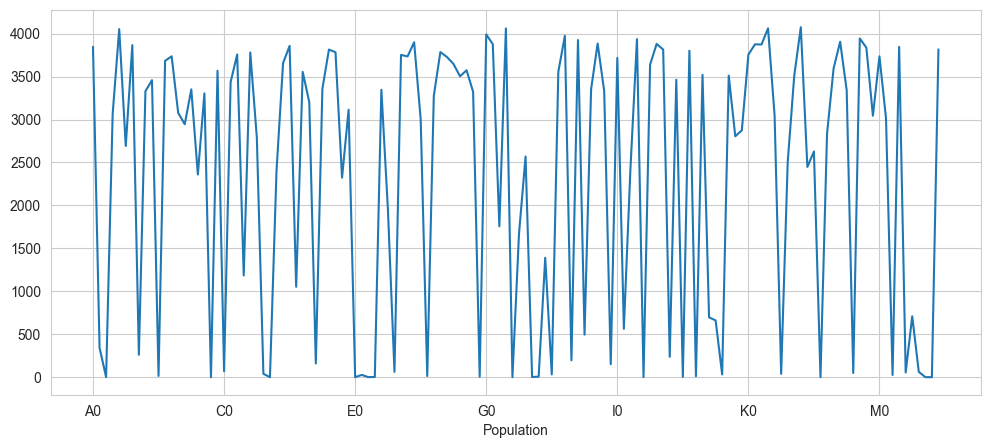

In [16]:
plt.figure(figsize=(12,5))
df.groupby('Population')['Infected'].sum().plot(kind='line')
plt.show()

On this diagram we can see how number of infected people is changed in every simulation stage. We can see that there is not constant increase in number of infected people, rather there is no particular trending in this values. There are stages with a lot of infected people, but in other hand there is a very few infected people in other stages, so we can't determine if there will in future be more or less infected people in one stage, without using some advanced methods like time series.

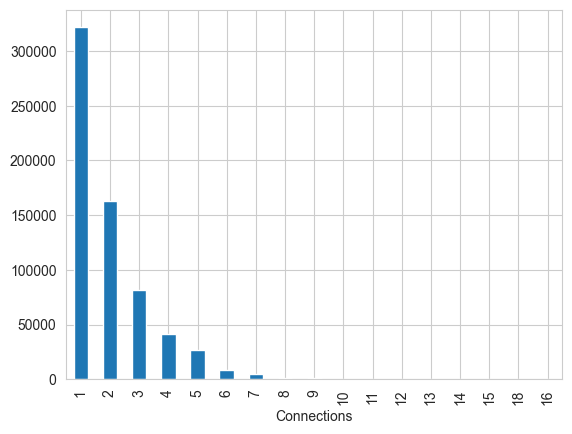

In [17]:
df.Connections.apply(lambda x: len(x.split())).value_counts().plot(kind='bar')
plt.show()

Variable `Connections` is giving information about which people was connected with others and on this diagram we can see how many people is conneceted to how many other people. Thsi variable will be our main sorce of new features that we will create, but that is going to be problem for other notebook.

With this we have went through all important points in this problem and in other notebook we will be solving this classification problem with all feature engineering and modeling. 